In [98]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv


In [99]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitsahoo/sales-forecasting")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sales-forecasting


In [100]:
# show the fie inside the dataset folder

import os
os.listdir(path)


['train.csv']

In [101]:
# Replacing read.csv with the actual file name

import pandas as pd
df = pd.read_csv(os.path.join(path, 'train.csv'))
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [102]:
# show rows and coulumn

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [103]:
# checking and handling missing values

df.isnull().sum()
df.fillna(0, inplace=True)



In [104]:
# Identifying the date colum

df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [105]:
# handling the date

date_columns = ['Order Date', 'Ship Date']
#conver to datetime
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors = 'coerce')

#verifying the changes
print (df[date_columns].dtypes)
print(df.head())



Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-12-06        NaT    Second Class    DV-13045   
3       4  US-2016-108966 2016-11-10        NaT  Standard Class    SO-20335   
4       5  US-2016-108966 2016-11-10        NaT  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Fl

In [106]:
# Add year and month coulumn from order date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month



In [107]:
# calculate total sales
total_sales = df['Sales'].sum()
print(total_sales)


2261536.7827000003


In [108]:
#calculate average sale
average_sales = df['Sales'].mean()
print(average_sales)


230.7690594591837


In [109]:
# calculate total sales by year
total_sales_by_year = df.groupby('Year')['Sales'].sum()
print(total_sales_by_year)



Year
2015.0    176986.5857
2016.0    162568.8627
2017.0    266254.6009
2018.0    266553.0743
Name: Sales, dtype: float64


In [110]:
#calculate total sale by month
total_sales_by_month = df.groupby('Month')['Sales'].sum()
print(total_sales_by_month)


Month
1.0      90957.9824
2.0     103951.1600
3.0      71788.6906
4.0      65094.9490
5.0      64277.0788
6.0      51099.1360
7.0      62393.9465
8.0     100560.3526
9.0      66582.3650
10.0     62563.7830
11.0     68274.3135
12.0     64819.3662
Name: Sales, dtype: float64


In [111]:
# checking for patterns and trends
import matplotlib.pyplot as plt
import seaborn as sns


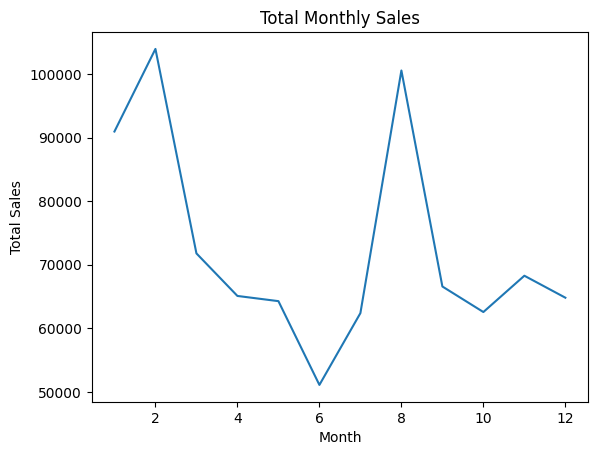

In [112]:
total_sales_by_month.plot(kind='line')
plt.title('Total Monthly Sales')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()




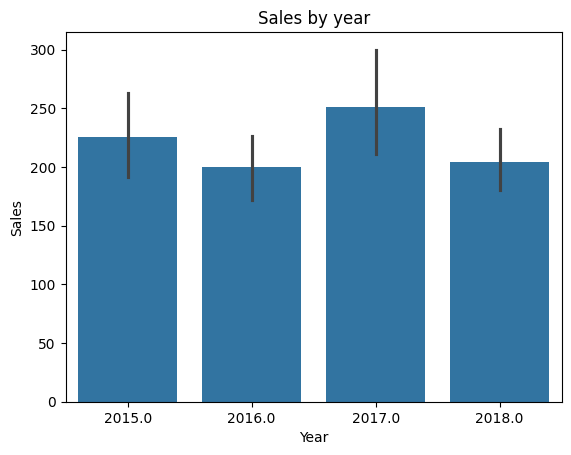

In [113]:
#comparing yearly sales
plt.figure()
sns.barplot(x='Year', y='Sales', data=df)
plt.title('Sales by year')
plt.show()


## Total Monthly Sales Analysis
### Key Observations
- Sales shows **clear fluctuations throughout the year**, indicating seasonalityrather than steady growth.
- The **highest sales peak** occur around **Freuary** and **August**, suggesting periods of icreased customer demand.
- The **lowest sales point** is observed in **June**, which may indicate a slow season or reduced market activity.

### Trend Analysis
- Sales decline steadily from **February to June**, reaching the lowest point mid-year.
- A **strong recovery** occurs from **June to August**, where sales sharply increase
- After August, sales stabilize with **moderate variations** towards the end of the year.

### Business Insights
- The mid-year dip may be linked to **seasonal factors**, budget cycles, or reduced promotions.
- High performance months ( Frebruary and August) could be leveraged for:
   - Major market campains
   - Product launch
   - Promotional discount

### Recommentations
- Introduce **targeted promotions** during low performing months (May-June) to boost sales.
- Analyse External factors (holidays, economic events, customer behvior) affecting peak months.
- Use this seasonal pattern to improve **sales forecasting and inventory planning**.
- 

## Conlutions
This analysis reaveals both **seasonal sales patterns** and **yearly performance variations**.
Understanding this trends allows business to:
- Optimize marketing timing
- Improve sales forcasting
- Make data-driven strategic decisions

Further analysis could include customer segmentation, product-level sales, or predictive modeling to enhance insights.
